# 📊 Análisis de Mortalidad en Argentina (2019-2022): Tendencias, Impacto y Desafíos en Salud Pública ⚕️
---

El análisis de datos de defunciones en Argentina es crucial para comprender las tendencias de mortalidad y sus determinantes. Este estudio busca identificar patrones y factores asociados a las muertes, proporcionando información valiosa para:

🔹 Formulación de políticas públicas 🏛️

🔹 Planificación de recursos sanitarios 🏨

🔹 Desarrollo de estrategias preventivas 🛑


👥 Audiencia beneficiada:

🔹 Profesionales de la salud 🩺

🔹 Investigadores 🔬

🔹 Responsables de políticas públicas 🏛️

🔹 ONGs enfocadas en salud pública 💚

---

Preguntas e Hipótesis a Responder❓

🔎 Causas y tendencias:

- ¿Cuáles son las principales causas de muerte en Argentina y cómo han evolucionado entre 2015 y 2022?

📍 Geografía y desigualdad:

- ¿Existen diferencias significativas en la mortalidad por provincias o regiones?


⚧ Género y edad:

- ¿Cómo varían las tasas de mortalidad según el sexo y los grupos etarios?


🌦 Factores temporales:

- ¿Se observan tendencias estacionales en las defunciones mensuales?


🦠 Impacto del COVID-19:

- ¿Qué efecto tuvo la pandemia en la mortalidad general y en las causas de muerte durante 2020 y 2021?


💰 Factores socioeconómicos:

- ¿Existen correlaciones entre variables socioeconómicas y la mortalidad en diferentes regiones?

## DATA WRANGLING 🧹

📌 Empezamos importando las librerías necesarias, y subiendo el DataSet original, para luego hacer las modificaciones pertinentes.

In [36]:
# Importación de Librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [77]:
# Lectura del DataSet original

df = pd.read_csv('http://datos.salud.gob.ar/dataset/c1643775-18e1-40fd-9e7f-0cebb5b1abe6/resource/5b21a088-3c04-4fdd-8741-82ab6add2730/download/arg_def_m_15_22.csv')

In [78]:
# Se muestran encabezados para comprobar la carga correcta

print (df.head())

     region jurisdiccion mes_anio_defuncion  mes_def  anio_def  sexo_id  \
0  1.Centro       2.CABA            07/2015        7      2015        1   
1  1.Centro       2.CABA            10/2015       10      2015        1   
2  1.Centro       2.CABA            12/2015       12      2015        1   
3  1.Centro       2.CABA            01/2015        1      2015        1   
4  1.Centro       2.CABA            06/2015        6      2015        1   

  sexo_nombre           grupo_etario  \
0   masculino  07. de 80 anios y mas   
1   masculino  07. de 80 anios y mas   
2   masculino    06.de 70 a 79 anios   
3   masculino  07. de 80 anios y mas   
4   masculino  07. de 80 anios y mas   

                   grupo_causa_defuncion_CIE10 cod_causa_muerte_CIE10  \
0  0100 CIERTAS ENF INFECCIOSAS Y PARASITARIAS                    A04   
1  0100 CIERTAS ENF INFECCIOSAS Y PARASITARIAS                    A04   
2  0100 CIERTAS ENF INFECCIOSAS Y PARASITARIAS                    A09   
3  0100 CIERTAS 

In [79]:
# Se cuenta la cantidad de registros que tiene el DataSed original

registros_df = df.shape [0]
print (f'Cantidad de registros: {registros_df}')

Cantidad de registros: 1969274


📌 Teniendo en cuenta que la cantidad de registros es muy alta (2 millones aprox) se decidió, a fines practicos, reducir el DataSet a una cantidad menor. Por lo que se aplicaron filtros para tomar datos solo del rango 2019-2022. Esto reduce los registros practicamente a la mitad, haciendo el analisis mas eficiente, considerando además que a pesar de esta reducción no se pierde el enfoque.

In [12]:
# Se crea un nuevo DataFrame a partir de un filtro

df_filtrado = df[df['anio_def'] >= 2019]

In [13]:
# Se muestra para comprobar los cambios

print (df_filtrado.head())

        region jurisdiccion mes_anio_defuncion  mes_def  anio_def  sexo_id  \
62413  6.Cuyo1  50.Mendoza.            06/2019        6      2019        1   
62414  6.Cuyo1  50.Mendoza.            06/2019        6      2019        1   
62415  6.Cuyo1  50.Mendoza.            04/2019        4      2019        1   
62416  6.Cuyo1  50.Mendoza.            07/2019        7      2019        1   
62417  6.Cuyo1  50.Mendoza.            10/2019       10      2019        1   

      sexo_nombre           grupo_etario grupo_causa_defuncion_CIE10  \
62413   masculino  07. de 80 anios y mas      0300 DIABETES MELLITUS   
62414   masculino  07. de 80 anios y mas      0300 DIABETES MELLITUS   
62415   masculino    03.de 40 a 49 anios      0300 DIABETES MELLITUS   
62416   masculino    04.de 50 a 59 anios      0300 DIABETES MELLITUS   
62417   masculino    04.de 50 a 59 anios      0300 DIABETES MELLITUS   

      cod_causa_muerte_CIE10  cantidad  
62413                    E14         1  
62414           

In [18]:
# Se vuelven a contar la cantidad de registros

registros_df_filtrado = df_filtrado.shape [0]
print (f'Cantidad de registros: {registros_df_filtrado}')

Cantidad de registros: 1001356


📌 Asignamos un nuevo nombre al DataFrame, colocando el nombre 'defunciones' que se considera más adecuado. Además modificamos los nombres de las columnas para mejorar la interpretación.

In [19]:
# Se asigna un nuevo nombre al DataFrame

defunciones = df_filtrado

In [20]:
# Se muestran los nombres de las columnas
defunciones.columns

Index(['region', 'jurisdiccion', 'mes_anio_defuncion', 'mes_def', 'anio_def',
       'sexo_id', 'sexo_nombre', 'grupo_etario', 'grupo_causa_defuncion_CIE10',
       'cod_causa_muerte_CIE10', 'cantidad'],
      dtype='object')

In [22]:
# Se modifican los nombres de las columnas

defunciones.columns = ["Region", "Jurisdiccion", "Mes_año", "Mes", "Año", "Sexo_ID", "Sexo", "Grupo_Etario", "Clasificacion", "Causa_CIE10", "Cantidad"]
print (defunciones.head())

        Region Jurisdiccion  Mes_año  Mes   Año  Sexo_ID       Sexo  \
62413  6.Cuyo1  50.Mendoza.  06/2019    6  2019        1  masculino   
62414  6.Cuyo1  50.Mendoza.  06/2019    6  2019        1  masculino   
62415  6.Cuyo1  50.Mendoza.  04/2019    4  2019        1  masculino   
62416  6.Cuyo1  50.Mendoza.  07/2019    7  2019        1  masculino   
62417  6.Cuyo1  50.Mendoza.  10/2019   10  2019        1  masculino   

                Grupo_Etario           Clasificacion Causa_CIE10  Cantidad  
62413  07. de 80 anios y mas  0300 DIABETES MELLITUS         E14         1  
62414  07. de 80 anios y mas  0300 DIABETES MELLITUS         E14         1  
62415    03.de 40 a 49 anios  0300 DIABETES MELLITUS         E14         1  
62416    04.de 50 a 59 anios  0300 DIABETES MELLITUS         E14         1  
62417    04.de 50 a 59 anios  0300 DIABETES MELLITUS         E14         1  


📌 Cómo en el DataSet original tenemos una columna con el Codigo de Causa de Defuncion, lo cual visto solo como codigo no es relevante. Decidí buscar en otra fuente a que refiere cada código para poder sumar este Dato al análisis. La búsqueda resultó satisfactoria y ahora puedo vincular el Codigo de Causa de Muerte a una Descripción para entender mejor cual fue realmente la Causa de Defunción en cada caso.

In [73]:
!wget "https://github.com/federuizdiaz/defunciones_DS/blob/main/CIE_10.xlsx" -O archivo.xlsx

import pandas as pd
causas = pd.read_excel("CIE_10.xlsx", engine='openpyxl')
causas.head()


--2025-04-02 21:49:17--  https://github.com/federuizdiaz/defunciones_DS/blob/main/CIE_10.xlsx
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘archivo.xlsx’

archivo.xlsx            [ <=>                ] 202.86K  --.-KB/s    in 0.04s   

2025-04-02 21:49:18 (5.54 MB/s) - ‘archivo.xlsx’ saved [207729]



,Clasificación Internacional de Enfermedades 10° CIE 10° REVISION,Unnamed: 1
0,Definición:\nUna clasificación de enfermedades...,NaN
1,NaN,NaN
2,Afección o códigos principal:\nSe define c...,NaN
3,CAPITUL,O I
4,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS,NaN


In [74]:
# Se muestran las columnas del nuevo archivo subido
causas.columns

Index(['Clasificación Internacional de Enfermedades 10° CIE 10° REVISION', 'Unnamed: 1'], dtype='object')

In [75]:
# Se modifican las columnas con nombres adecuados para poder unir con el DataFrame
causas.columns = ["Causa_CIE10", "Descripcion"]
print (causas.head())

                                         Causa_CIE10 Descripcion
0  Definición:\nUna clasificación de enfermedades...         NaN
1                                                NaN         NaN
2  Afección o códigos principal:\nSe   define   c...         NaN
3                                            CAPITUL         O I
4    CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS         NaN


📌 Una vez subida la nueva fuente de Datos, hacemos el MERGE con el DataFrame Defunciones para, ahora sí, tener la información completa!

In [27]:
# Se ejecuta el MERGE para unir la columna que nos interesa del nuevo archivo subido
defunciones = defunciones.merge(causas, on="Causa_CIE10", how="left")

print(defunciones.head())

    Region Jurisdiccion  Mes_año  Mes   Año  Sexo_ID       Sexo  \
0  6.Cuyo1  50.Mendoza.  06/2019    6  2019        1  masculino   
1  6.Cuyo1  50.Mendoza.  06/2019    6  2019        1  masculino   
2  6.Cuyo1  50.Mendoza.  04/2019    4  2019        1  masculino   
3  6.Cuyo1  50.Mendoza.  07/2019    7  2019        1  masculino   
4  6.Cuyo1  50.Mendoza.  10/2019   10  2019        1  masculino   

            Grupo_Etario           Clasificacion Causa_CIE10  Cantidad  \
0  07. de 80 anios y mas  0300 DIABETES MELLITUS         E14         1   
1  07. de 80 anios y mas  0300 DIABETES MELLITUS         E14         1   
2    03.de 40 a 49 anios  0300 DIABETES MELLITUS         E14         1   
3    04.de 50 a 59 anios  0300 DIABETES MELLITUS         E14         1   
4    04.de 50 a 59 anios  0300 DIABETES MELLITUS         E14         1   

                          Descripcion  
0  Diabetes mellitus, no especificada  
1  Diabetes mellitus, no especificada  
2  Diabetes mellitus, no especif

In [50]:
# Se muestran (sin duplicados) los valores de Region
print(defunciones['Region'].unique())


['6.Cuyo1' '7.Cuyo2.' '8.Pat. Norte.' '1.Centro' '5.NOA2.' '9.Pat.Sur.'
 '2.NEA.' '3.NOA1.' '4.NOA.' '10.sin especificar.']


In [58]:
# Se renombran estos datos para unificar categorías que aparecían duplicadas.
defunciones['Region'] = defunciones['Region'].replace({
    '1.Centro': 'Centro',
    '2.NEA.': 'NEA',
    '6.Cuyo1' : 'Cuyo',
    '7.Cuyo2.' : 'Cuyo',
    '8.Pat. Norte.' : 'Patagonia',
    '5.NOA2.' : 'NOA',
    '9.Pat.Sur.' : 'Patagonia',
    '3.NOA1.' : 'NOA',
    '4.NOA.' : 'NOA',
    '10.sin especificar.' : 'Sin especificar',
})

In [29]:
# Una vez terminadas las modiciaciones del DataFrame, lo exportamos en formato CSV para almacenar una copia.

ruta_salida = "defunciones_resultado.csv"
defunciones.to_csv(ruta_salida, index=False, encoding="utf-8")


from google.colab import files
files.download(ruta_salida)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## EDA - Analisis Exploratorio de Datos

In [52]:
# @title
# Mostrar información general
defunciones.info()
print("\nResumen estadístico:")
print(defunciones.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001356 entries, 0 to 1001355
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Region         1001356 non-null  object
 1   Jurisdiccion   1001356 non-null  object
 2   Mes_año        1001356 non-null  object
 3   Mes            1001356 non-null  int64 
 4   Año            1001356 non-null  int64 
 5   Sexo_ID        1001356 non-null  int64 
 6   Sexo           1001356 non-null  object
 7   Grupo_Etario   1001356 non-null  object
 8   Clasificacion  1001356 non-null  object
 9   Causa_CIE10    1001356 non-null  object
 10  Cantidad       1001356 non-null  int64 
 11  Descripcion    960103 non-null   object
dtypes: int64(4), object(8)
memory usage: 91.7+ MB

Resumen estadístico:
                Mes           Año       Sexo_ID      Cantidad
count  1.001356e+06  1.001356e+06  1.001356e+06  1.001356e+06
mean   6.519160e+00  2.020532e+03  1.522033e+00  1.544767e+0

🔵 Defunciones por Año
---
📅 En este gráfico de barras se muestra la cantidad de defunciones registradas en cada año disponible en el dataset. Esto permite identificar tendencias generales y posibles anomalías, como aumentos significativos en ciertos períodos.

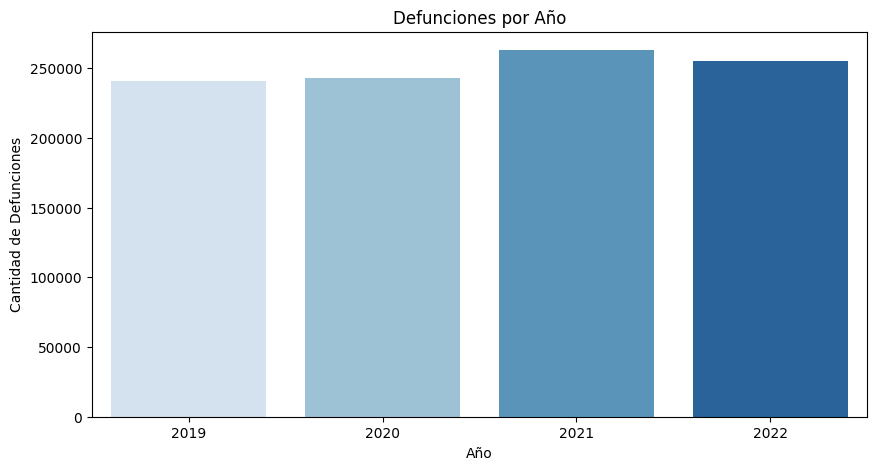

In [37]:
# @title
# Defunciones por año
plt.figure(figsize=(10,5))
sns.barplot(x=defunciones['Año'].value_counts().index, y=defunciones['Año'].value_counts().values, palette="Blues")
plt.title("Defunciones por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Defunciones")
plt.show()

📈 Tendencia de Defunciones por Mes
---
📊 Se utilizó un gráfico de líneas para analizar la variación mensual de las defunciones. Esto ayuda a identificar patrones estacionales, como aumentos en invierno (debido a enfermedades respiratorias) o eventos extraordinarios como la pandemia.

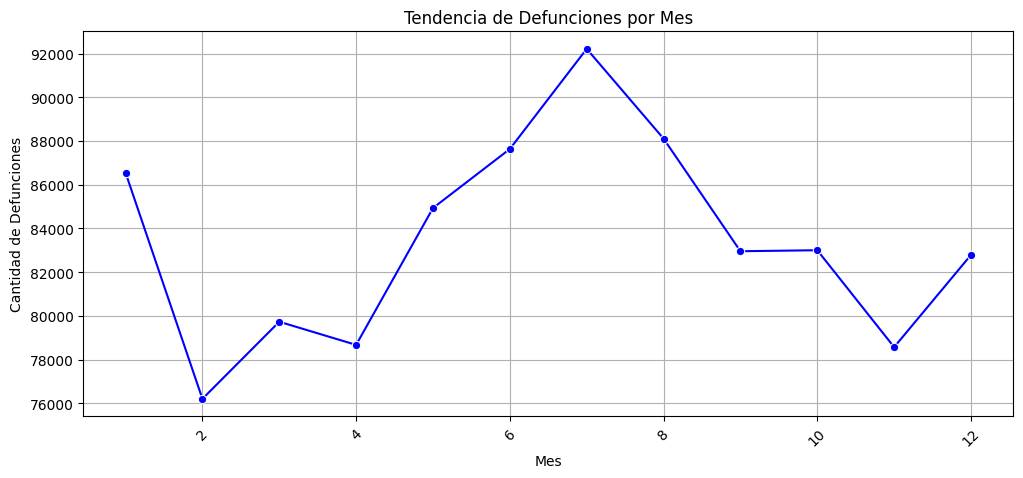

In [63]:
# @title
# Defunciones por mes
defunciones_mes = defunciones['Mes'].value_counts().reset_index()
defunciones_mes.columns = ['Mes', 'Cantidad']
plt.figure(figsize=(12,5))
sns.lineplot(data=defunciones_mes, x='Mes', y='Cantidad', marker='o', linestyle='-', color='b')
plt.title("Tendencia de Defunciones por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Defunciones")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

🚻 Distribución de Defunciones por Género
---
📊 Se presenta un gráfico de torta para visualizar la proporción de defunciones según el género reportado (Masculino, Femenino, Indeterminado y Desconocido). Esto ayuda a evaluar si existen diferencias significativas entre géneros.

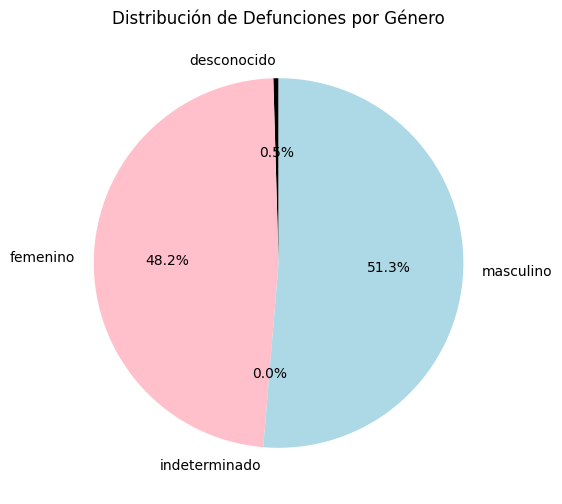

In [64]:
# @title
# Análisis por género
gender_counts = defunciones.groupby('Sexo')['Cantidad'].sum()
plt.figure(figsize=(6,6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['black', 'pink', 'gray', 'lightblue'], startangle=90)
plt.title("Distribución de Defunciones por Género")
plt.ylabel("")
plt.show()

👶👵 Defunciones por Grupo Etario
---
📊 Un gráfico de barras muestra la cantidad de defunciones según el grupo etario. Esto permite entender qué franjas de edad tienen mayor mortalidad y detectar tendencias, como mayor riesgo en adultos mayores.

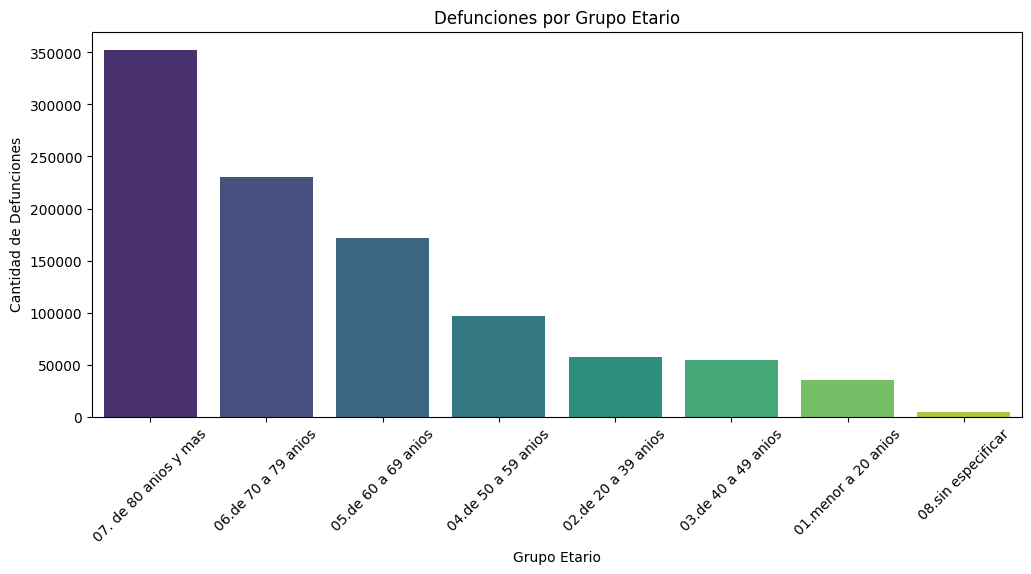

In [65]:
# @title
# Defunciones por grupo etario
group_counts = defunciones['Grupo_Etario'].value_counts()
plt.figure(figsize=(12,5))
sns.barplot(x=group_counts.index, y=group_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Defunciones por Grupo Etario")
plt.xlabel("Grupo Etario")
plt.ylabel("Cantidad de Defunciones")
plt.show()

⚕️ Principales Causas de Defunción
---
📊 Se presenta un gráfico de barras con las 10 principales causas de muerte según el código CIE-10. Este análisis permite identificar enfermedades o eventos con mayor impacto en la mortalidad.

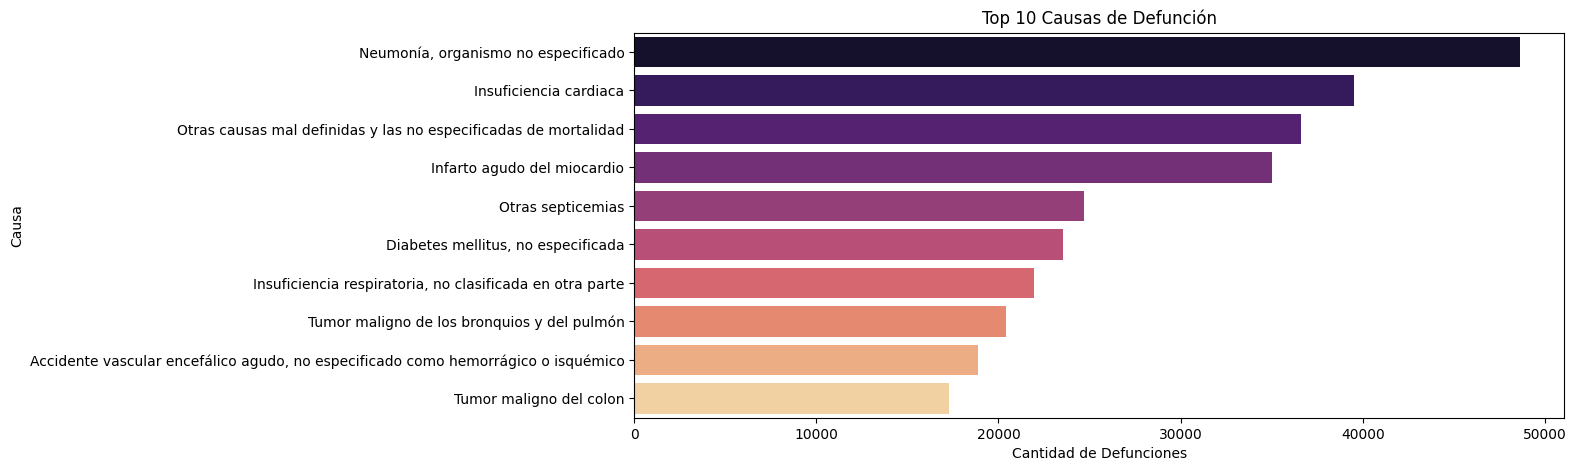

In [66]:
# @title
# Principales causas de muerte
top_causas = defunciones['Descripcion'].value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(y=top_causas.index, x=top_causas.values, palette="magma")
plt.title("Top 10 Causas de Defunción")
plt.xlabel("Cantidad de Defunciones")
plt.ylabel("Causa")
plt.show()

🌍 Defunciones por Región
---
📊 Un gráfico de barras muestra la distribución de defunciones por región, permitiendo analizar desigualdades geográficas en la mortalidad y detectar zonas con mayor incidencia de fallecimientos.

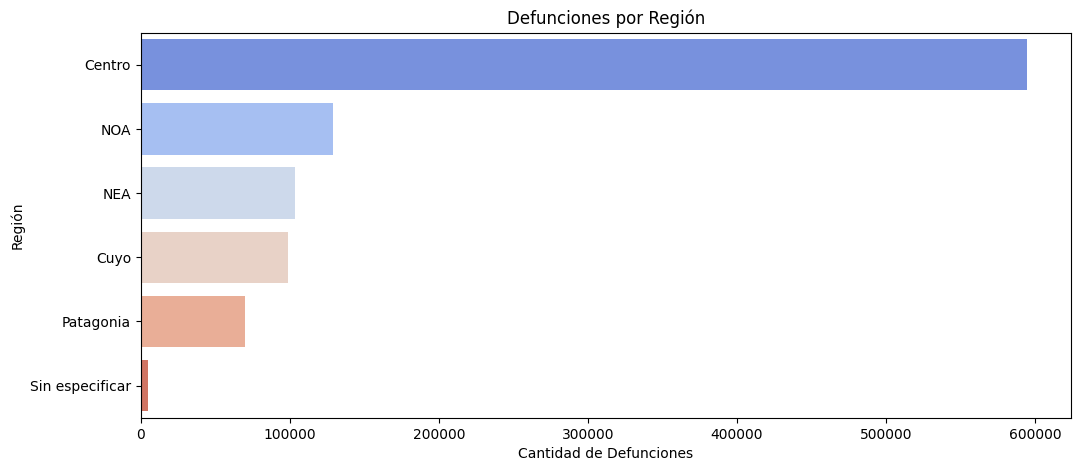

In [67]:
# @title
# Defunciones por región
plt.figure(figsize=(12,5))
sns.barplot(y=defunciones['Region'].value_counts().index, x=defunciones['Region'].value_counts().values, palette="coolwarm")
plt.title("Defunciones por Región")
plt.xlabel("Cantidad de Defunciones")
plt.ylabel("Región")
plt.show()

🦠 Impacto de la Pandemia (2020-2021)
---
📈 Se utilizó un gráfico de líneas para comparar la cantidad de defunciones durante la pandemia de COVID-19 en 2020 y 2021. Esto ayuda a visualizar el impacto en términos de exceso de mortalidad durante esos años.

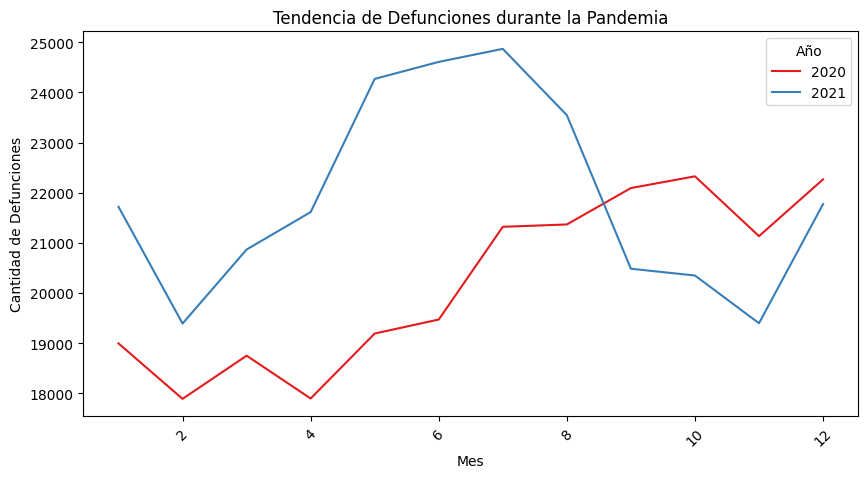

In [68]:
# @title
# Impacto de la pandemia (2020-2021)
covid_years = defunciones[defunciones['Año'].isin([2020, 2021])]
covid_counts = covid_years.groupby(['Mes', 'Año']).size().reset_index(name='Cantidad')
plt.figure(figsize=(10,5))
sns.lineplot(data=covid_counts, x='Mes', y='Cantidad', hue='Año', palette="Set1")
plt.xticks(rotation=45)
plt.title("Tendencia de Defunciones durante la Pandemia")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Defunciones")
plt.show()

# Conclusiones del Análisis de Defunciones en Argentina

##📊 1. Tendencias Generales
El análisis de las defunciones a lo largo de los años muestra una variación en la cantidad de fallecimientos por distintos factores, entre ellos el impacto de la pandemia de COVID-19 (2020-2021), donde se observó un incremento significativo. Esta tendencia resalta la importancia de eventos sanitarios en la mortalidad general.

##👨‍👩‍👧‍👦 2. Diferencias por Género
Se identificó que las defunciones presentan diferencias según el género, siendo los valores más altos en hombres, seguidos por mujeres.

##🎂 3. Mortalidad por Grupo Etario
El análisis de las defunciones por grupos etarios confirma que las edades más avanzadas presentan la mayor cantidad de fallecimientos, lo cual es esperable debido a la relación natural entre edad y mortalidad. Sin embargo, es importante profundizar en las causas específicas de fallecimiento en ciertos grupos vulnerables, como los neonatos o jóvenes.

##⚠️ 4. Principales Causas de Muerte
El análisis de las principales causas de defunción revela que ciertas enfermedades no transmisibles, como problemas cardiovasculares y respiratorios, tienen un peso significativo en la mortalidad total. La identificación de estas causas es clave para diseñar políticas de salud pública más efectivas.

##📅 5. Estacionalidad y Patrones Temporales
Se observó que las defunciones presentan cierta estacionalidad, con picos en algunos meses del año. Esto puede estar relacionado con factores climáticos, brotes epidémicos o períodos de mayor vulnerabilidad en la población.

